In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
import pickle
with open('./20181031 result/sp500_model(Not Feature Selected).pickle', 'rb') as handle:
    model = pickle.load(handle)

In [4]:
y_li = list(model.keys())

In [6]:
from pandas_datareader import data as pdr
import fix_yahoo_finance
sp500 = fix_yahoo_finance.download("^GSPC", start="2011-01-01", end="2018-10-30")

[*********************100%***********************]  1 of 1 downloaded


ValueError: zero-size array to reduction operation maximum which has no identity

In [72]:
sp500 = pd.read_csv("s&p500.csv")

In [73]:
sp500.index = sp500.Date
del sp500['Date']
del sp500['Volume']

In [74]:
sp500.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2010-12-31,1256.760010,1259.339966,1254.189941,1257.640015,1257.640015
2011-01-03,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995
2011-01-04,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951
2011-01-05,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059
2011-01-06,1276.290039,1278.170044,1270.430054,1273.849976,1273.849976


In [75]:
sp500["pct_change"] = sp500.Close.pct_change()

In [76]:
sp500.head()

,Open,High,Low,Close,Adj Close,pct_change
Date,,,,,,
2010-12-31,1256.760010,1259.339966,1254.189941,1257.640015,1257.640015,NaN
2011-01-03,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995,0.011315
2011-01-04,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951,-0.001313
2011-01-05,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059,0.005007
2011-01-06,1276.290039,1278.170044,1270.430054,1273.849976,1273.849976,-0.002123


In [77]:
for i in range(3, 31, 2):
    sp500["close_ma_{}".format(i)] = sp500.Close.rolling(window = i).mean()

In [78]:
sp500.head()

,Open,High,Low,Close,Adj Close,pct_change,close_ma_3,close_ma_5,close_ma_7,close_ma_9,close_ma_11,close_ma_13,close_ma_15,close_ma_17,close_ma_19,close_ma_21,close_ma_23,close_ma_25,close_ma_27,close_ma_29
Date,,,,,,,,,,,,,,,,,,,,
2010-12-31,1256.760010,1259.339966,1254.189941,1257.640015,1257.640015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995,0.011315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951,-0.001313,1266.569987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059,0.005007,1272.876668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,1276.290039,1278.170044,1270.430054,1273.849976,1273.849976,-0.002123,1273.536662,1270.023999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
for i in [7, 21, 30, 60, 90, 91, 100, 120]:
    sp500["his_vol_{}".format(i)] = sp500["pct_change"].rolling(window = i).std()*(252**0.5)

In [80]:
sp500.iloc[5:10]

,Open,High,Low,Close,Adj Close,pct_change,close_ma_3,close_ma_5,close_ma_7,close_ma_9,...,close_ma_27,close_ma_29,his_vol_7,his_vol_21,his_vol_30,his_vol_60,his_vol_90,his_vol_91,his_vol_100,his_vol_120
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,1274.410034,1276.829956,1261.699951,1271.500000,1271.500000,-0.001845,1273.970012,1272.795996,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,1270.839966,1271.520020,1262.180054,1269.750000,1269.750000,-0.001376,1271.699992,1272.371997,1270.195714,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-11,1272.579956,1277.250000,1269.619995,1274.479980,1274.479980,0.003725,1271.909993,1273.228003,1272.601423,NaN,...,NaN,NaN,0.080133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-12,1275.650024,1286.869995,1275.650024,1285.959961,1285.959961,0.009008,1276.729980,1275.107983,1274.614275,1272.423326,...,NaN,NaN,0.069216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-13,1285.780029,1286.699951,1280.469971,1283.760010,1283.760010,-0.001711,1281.399984,1277.089990,1276.551427,1275.325548,...,NaN,NaN,0.069952,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
for i in [1, 3, 5, 7, 10, 12, 14]:
    sp500['returnsCO{}'.format(i) ]= np.log(sp500.Open / sp500.Close.shift(i))
    sp500['returnsCC{}'.format(i) ]= np.log(sp500.Close / sp500.Close.shift(i))
    sp500['returnsOO{}'.format(i) ] = np.log(sp500.Open / sp500.Open.shift(i))
    sp500['returnsOC{}'.format(i) ] = np.log(sp500.Close / sp500.Open.shift(i))

In [82]:
sp500[sp500.columns[-28:-16]].head()

,returnsCO1,returnsCC1,returnsOO1,returnsOC1,returnsCO3,returnsCC3,returnsOO3,returnsOC3,returnsCO5,returnsCC5,returnsOO5,returnsOC5
Date,,,,,,,,,,,,
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,-0.000016,0.011251,0.000684,0.011951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.000849,-0.001314,0.012116,0.009953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,-0.001118,0.004995,-0.003281,0.002832,0.008819,0.014932,0.009519,0.015632,NaN,NaN,NaN,NaN
2011-01-06,-0.000212,-0.002125,0.005902,0.003988,0.003469,0.001556,0.014736,0.012823,NaN,NaN,NaN,NaN


In [83]:
for i in [1, 3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50,
          55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]:
    for shift in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        sp500['Y1_{}_s{}'.format(i, shift)] = (sp500.Close - sp500.Close.shift(shift).rolling(i).mean())
        sp500['Y3_{}_s{}'.format(i, shift)] = (sp500.Close.rolling(i).mean() - sp500.Close.shift(shift).rolling(i).mean())
        sp500['sh{}_Y1_{}'.format(shift, i)] = np.where((sp500['Y1_{}_s{}'.format(i, shift)]).shift(-1*shift)>=0, 1, 0)
        sp500['sh{}_Y3_{}'.format(shift, i)] = np.where((sp500['Y3_{}_s{}'.format(i, shift)]).shift(-1*shift)>=0, 1, 0)
        sp500['sh{}_Y_val'.format(shift)] = (sp500.Close - sp500.Close.shift(shift)).shift(-1*shift)

In [84]:
sp500_test = sp500.loc['2018-07-01':'2018-10-01']
sp500 = sp500.loc['2013-07-01':'2018-07-01']

In [85]:
sp500[['Close', 'Y1_1_s5', 'Y3_1_s5']].head()

,Close,Y1_1_s5,Y3_1_s5
Date,,,
2013-07-01,1614.959961,41.869995,41.869995
2013-07-02,1614.079956,26.049927,26.049927
2013-07-03,1615.410034,12.150024,12.150024
2013-07-05,1631.890015,18.690064,18.690064
2013-07-08,1640.459961,34.179932,34.179932


In [86]:
%run moon_code

In [87]:
X = [i for i in sp500.columns 
     if (i.find('sh') == -1) 
     if (i.find('Volume') == -1)]
X2 = [i for i in sp500.columns 
     if (i.find('Y') == -1) 
     if (i.find('Volume') == -1)]

In [88]:
X

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'pct_change',
 'close_ma_3',
 'close_ma_5',
 'close_ma_7',
 'close_ma_9',
 'close_ma_11',
 'close_ma_13',
 'close_ma_15',
 'close_ma_17',
 'close_ma_19',
 'close_ma_21',
 'close_ma_23',
 'close_ma_25',
 'close_ma_27',
 'close_ma_29',
 'his_vol_7',
 'his_vol_21',
 'his_vol_30',
 'his_vol_60',
 'his_vol_90',
 'his_vol_91',
 'his_vol_100',
 'his_vol_120',
 'returnsCO1',
 'returnsCC1',
 'returnsOO1',
 'returnsOC1',
 'returnsCO3',
 'returnsCC3',
 'returnsOO3',
 'returnsOC3',
 'returnsCO5',
 'returnsCC5',
 'returnsOO5',
 'returnsOC5',
 'returnsCO7',
 'returnsCC7',
 'returnsOO7',
 'returnsOC7',
 'returnsCO10',
 'returnsCC10',
 'returnsOO10',
 'returnsOC10',
 'returnsCO12',
 'returnsCC12',
 'returnsOO12',
 'returnsOC12',
 'returnsCO14',
 'returnsCC14',
 'returnsOO14',
 'returnsOC14',
 'Y1_1_s1',
 'Y3_1_s1',
 'Y1_1_s2',
 'Y3_1_s2',
 'Y1_1_s3',
 'Y3_1_s3',
 'Y1_1_s4',
 'Y3_1_s4',
 'Y1_1_s5',
 'Y3_1_s5',
 'Y1_1_s6',
 'Y3_1_s6',
 'Y1_1_s7',
 'Y3_1

In [89]:
X2

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'pct_change',
 'close_ma_3',
 'close_ma_5',
 'close_ma_7',
 'close_ma_9',
 'close_ma_11',
 'close_ma_13',
 'close_ma_15',
 'close_ma_17',
 'close_ma_19',
 'close_ma_21',
 'close_ma_23',
 'close_ma_25',
 'close_ma_27',
 'close_ma_29',
 'his_vol_7',
 'his_vol_21',
 'his_vol_30',
 'his_vol_60',
 'his_vol_90',
 'his_vol_91',
 'his_vol_100',
 'his_vol_120',
 'returnsCO1',
 'returnsCC1',
 'returnsOO1',
 'returnsOC1',
 'returnsCO3',
 'returnsCC3',
 'returnsOO3',
 'returnsOC3',
 'returnsCO5',
 'returnsCC5',
 'returnsOO5',
 'returnsOC5',
 'returnsCO7',
 'returnsCC7',
 'returnsOO7',
 'returnsOC7',
 'returnsCO10',
 'returnsCC10',
 'returnsOO10',
 'returnsOC10',
 'returnsCO12',
 'returnsCC12',
 'returnsOO12',
 'returnsOC12',
 'returnsCO14',
 'returnsCC14',
 'returnsOO14',
 'returnsOC14']

In [90]:
train, test = train_test_split(sp500, 0.8, dtrain=True)

In [91]:
X111 = [i for i in X if (i.find('CO') == -1)]

In [1]:
y1 = pd.DataFrame()
y3 = pd.DataFrame()
for idx, y in enumerate(y_li):
    acc = metrics.accuracy_score(test[y], model[y].predict(test[X111]))
    auc = metrics.roc_auc_score(test[y], model[y].predict(test[X111]))
    res = pd.DataFrame([acc,auc], index=['accuracy', 'AUC'], columns=[y])
    if idx%2==0:
        y1 = pd.concat((y1, res), axis=1)
    else:
        y3 = pd.concat((y3, res), axis=1)

Y1 = np.array([])
for i in range(int(270/10)):
    i *= 10
    if i == 0:
        Y1 = y1.values[:,i:i+10]
    else:
        Y1 = np.vstack((Y1, y1.values[:,i:i+10]))

Y3 = np.array([])
for i in range(int(270/10)):
    i *= 10
    if i == 0:
        Y3 = y3.values[:,i:i+10]
    else:
        Y3 = np.vstack((Y3, y3.values[:,i:i+10]))

Y = np.hstack((Y3, Y1))

NameError: name 'pd' is not defined

In [2]:
li2 = [1,3,5,7]
li = [i*5 for i in range(2, 25)]
li2.extend(li)
li = ['ma ' + str(i) for i in li2]
mli = pd.MultiIndex.from_product([li, ['accuracy','auc']])
mli2 = pd.MultiIndex.from_product([['Y3','Y1'], [str(i)+'일'for i in range(1,11)]])

NameError: name 'pd' is not defined

In [95]:
res1 = pd.DataFrame(Y, index=mli, columns=mli2)
res1

Y3                                                    \
                       1일        2일        3일        4일        5일        6일   
ma 1   accuracy  0.492063  0.484127  0.476190  0.531746  0.500000  0.547619   
       auc       0.506107  0.475342  0.443033  0.459653  0.474190  0.484922   
ma 3   accuracy  0.666667  0.690476  0.623016  0.559524  0.579365  0.507937   
       auc       0.678883  0.684218  0.582166  0.508806  0.508591  0.459355   
ma 5   accuracy  0.837302  0.777778  0.746032  0.730159  0.646825  0.626984   
       auc       0.824972  0.755707  0.730398  0.702035  0.612095  0.580791   
ma 7   accuracy  0.869048  0.849206  0.825397  0.769841  0.769841  0.710317   
       auc       0.852122  0.835150  0.797176  0.736271  0.732429  0.668615   
ma 10  accuracy  0.916667  0.873016  0.845238  0.853175  0.797619  0.805556   
       auc       0.908893  0.837606  0.797773  0.809217  0.756141  0.759890   
ma 15  accuracy  0.924603  0.916667  0.912698  0.904762  0.900794  0.876984   
       auc       0.904716  0.880769  0.882418  0.882775  0.841993  0.827685   
ma 20  accuracy  0.912698  0.936508  0.920635  0.932540  0.920635  0.912698   
       auc       0.887869  0.898901  0.882157  0.906454  0.882157  0.875936   
ma 25  accuracy  0.952381  0.928571  0.928571  0.912698  0.912698  0.888889   
       auc       0.937500  0.907478  0.898918  0.884591  0.879309  0.839560   
ma 30  accuracy  0.904762  0.904762  0.888889  0.865079  0.884921  0.861111   
       auc       0.854945  0.872527  0.843956  0.807641  0.837401  0.802991   
ma 35  accuracy  0.952381  0.932540  0.900794  0.861111  0.853175  0.845238   
       auc       0.928646  0.922024  0.882278  0.825187  0.812011  0.798469   
ma 40  accuracy  0.932540  0.932540  0.924603  0.916667  0.932540  0.920635   
       auc       0.891324  0.901915  0.895577  0.886364  0.896465  0.875421   
ma 45  accuracy  0.964286  0.936508  0.920635  0.904762  0.916667  0.908730   
       auc       0.931386  0.881127  0.890821  0.823554  0.836232  0.843385   
ma 50  accuracy  0.920635  0.928571  0.956349  0.964286  0.944444  0.964286   
       auc       0.840503  0.882304  0.944457  0.950762  0.909524  0.941527   
ma 55  accuracy  0.964286  0.944444  0.920635  0.932540  0.916667  0.932540   
       auc       0.924607  0.909524  0.903479  0.892857  0.859921  0.857429   
ma 60  accuracy  0.956349  0.944444  0.940476  0.916667  0.912698  0.940476   
       auc       0.895330  0.888221  0.853066  0.802855  0.795238  0.866200   
ma 65  accuracy  0.968254  0.964286  0.964286  0.968254  0.956349  0.964286   
       auc       0.939328  0.926508  0.892400  0.916380  0.879921  0.936981   
ma 70  accuracy  0.948413  0.952381  0.932540  0.932540  0.924603  0.936508   
       auc       0.907624  0.890931  0.846814  0.851946  0.841063  0.866667   
ma 75  accuracy  0.964286  0.968254  0.952381  0.948413  0.916667  0.876984   
       auc       0.933566  0.935970  0.886450  0.892465  0.813951  0.711209   
ma 80  accuracy  0.948413  0.940476  0.956349  0.952381  0.944444  0.944444   
       auc       0.907729  0.901224  0.905762  0.903335  0.883861  0.864711   
ma 85  accuracy  0.960317  0.952381  0.932540  0.904762  0.916667  0.936508   
       auc       0.913687  0.908992  0.787137  0.700000  0.767925  0.815818   
ma 90  accuracy  0.956349  0.936508  0.924603  0.944444  0.940476  0.940476   
       auc       0.854830  0.851592  0.828704  0.868591  0.866298  0.885795   
ma 95  accuracy  0.984127  0.960317  0.956349  0.952381  0.952381  0.948413   
       auc       0.958519  0.875766  0.941627  0.939415  0.902379  0.917974   
ma 100 accuracy  0.952381  0.976190  0.984127  0.976190  0.968254  0.964286   
       auc       0.837069  0.943723  0.968534  0.904743  0.920949  0.893939   
ma 105 accuracy  0.984127  0.988095  1.000000  0.976190  0.980159  0.984127   
       auc       0.955262  0.926471  1.000000  0.953782  0.922269  0.957983   
ma 110 accuracy  0.904762  0.996032  0.992063  0.992063  0.992063  0.9880

In [97]:
from sklearn import metrics

In [119]:
sp500[['sh2_Y_val', 'sh2_Y3_1']]

,sh2_Y_val,sh2_Y3_1
Date,,
2013-07-01,0.450073,1
2013-07-02,17.810059,1
2013-07-03,25.049927,1
2013-07-05,20.429931,1
2013-07-08,12.160034,1
2013-07-09,22.700074,1
2013-07-10,27.569946,1
2013-07-11,7.479980,1
2013-07-12,-3.929931,0


In [98]:
for idx, y in enumerate(y_li):
    try:
        k = int(y[2:4])
    except:
        k = int(y[2])
    real_y = 'Y_val_sh{}'.format(k)
    print(real_y, '\t', y)

Y_val_sh1 	 sh1_Y1_1
Y_val_sh1 	 sh1_Y3_1
Y_val_sh2 	 sh2_Y1_1
Y_val_sh2 	 sh2_Y3_1
Y_val_sh3 	 sh3_Y1_1
Y_val_sh3 	 sh3_Y3_1
Y_val_sh4 	 sh4_Y1_1
Y_val_sh4 	 sh4_Y3_1
Y_val_sh5 	 sh5_Y1_1
Y_val_sh5 	 sh5_Y3_1
Y_val_sh6 	 sh6_Y1_1
Y_val_sh6 	 sh6_Y3_1
Y_val_sh7 	 sh7_Y1_1
Y_val_sh7 	 sh7_Y3_1
Y_val_sh8 	 sh8_Y1_1
Y_val_sh8 	 sh8_Y3_1
Y_val_sh9 	 sh9_Y1_1
Y_val_sh9 	 sh9_Y3_1
Y_val_sh10 	 sh10_Y1_1
Y_val_sh10 	 sh10_Y3_1
Y_val_sh1 	 sh1_Y1_3
Y_val_sh1 	 sh1_Y3_3
Y_val_sh2 	 sh2_Y1_3
Y_val_sh2 	 sh2_Y3_3
Y_val_sh3 	 sh3_Y1_3
Y_val_sh3 	 sh3_Y3_3
Y_val_sh4 	 sh4_Y1_3
Y_val_sh4 	 sh4_Y3_3
Y_val_sh5 	 sh5_Y1_3
Y_val_sh5 	 sh5_Y3_3
Y_val_sh6 	 sh6_Y1_3
Y_val_sh6 	 sh6_Y3_3
Y_val_sh7 	 sh7_Y1_3
Y_val_sh7 	 sh7_Y3_3
Y_val_sh8 	 sh8_Y1_3
Y_val_sh8 	 sh8_Y3_3
Y_val_sh9 	 sh9_Y1_3
Y_val_sh9 	 sh9_Y3_3
Y_val_sh10 	 sh10_Y1_3
Y_val_sh10 	 sh10_Y3_3
Y_val_sh1 	 sh1_Y1_5
Y_val_sh1 	 sh1_Y3_5
Y_val_sh2 	 sh2_Y1_5
Y_val_sh2 	 sh2_Y3_5
Y_val_sh3 	 sh3_Y1_5
Y_val_sh3 	 sh3_Y3_5
Y_val_sh4 	 sh4_Y1_5
Y_val

In [99]:
y1 = pd.DataFrame()
y3 = pd.DataFrame()
for idx, y in enumerate(y_li):
    try:
        k = int(y[2:4])
    except:
        k = int(y[2])
    real_y = 'sh{}_Y_val'.format(k)
    acc = metrics.accuracy_score(np.where(test[real_y]>0, 1, 0), model[y].predict(test[X111]))
    auc = metrics.roc_auc_score(np.where(test[real_y]>0, 1, 0), model[y].predict(test[X111]))
    res = pd.DataFrame([acc,auc], index=['accuracy', 'AUC'], columns=[y])
    if idx%2==0:
        y1 = pd.concat((y1, res), axis=1)
    else:
        y3 = pd.concat((y3, res), axis=1)

Y1 = np.array([])
for i in range(int(270/10)):
    i *= 10
    if i == 0:
        Y1 = y1.values[:,i:i+10]
    else:
        Y1 = np.vstack((Y1, y1.values[:,i:i+10]))

Y3 = np.array([])
for i in range(int(270/10)):
    i *= 10
    if i == 0:
        Y3 = y3.values[:,i:i+10]
    else:
        Y3 = np.vstack((Y3, y3.values[:,i:i+10]))

Y2 = np.hstack((Y3, Y1))

In [100]:
res2 = pd.DataFrame(Y2, index=mli, columns=mli2)
res2

Y3                                                    \
                       1일        2일        3일        4일        5일        6일   
ma 1   accuracy  0.492063  0.484127  0.476190  0.531746  0.500000  0.547619   
       auc       0.506107  0.475342  0.443033  0.459653  0.474190  0.484922   
ma 3   accuracy  0.464286  0.519841  0.507937  0.547619  0.571429  0.500000   
       auc       0.465307  0.504753  0.470768  0.496918  0.507001  0.455550   
ma 5   accuracy  0.511905  0.551587  0.531746  0.547619  0.551587  0.555556   
       auc       0.487266  0.520202  0.503625  0.499720  0.510867  0.506167   
ma 7   accuracy  0.488095  0.563492  0.563492  0.551587  0.595238  0.579365   
       auc       0.455561  0.530006  0.521716  0.494326  0.541484  0.523918   
ma 10  accuracy  0.500000  0.563492  0.551587  0.583333  0.559524  0.571429   
       auc       0.465696  0.515746  0.496608  0.510017  0.495193  0.496542   
ma 15  accuracy  0.500000  0.523810  0.559524  0.543651  0.551587  0.547619   
       auc       0.459979  0.468806  0.504988  0.468689  0.459248  0.454267   
ma 20  accuracy  0.511905  0.543651  0.539683  0.563492  0.555556  0.555556   
       auc       0.471544  0.486928  0.479215  0.483749  0.473145  0.463249   
ma 25  accuracy  0.507937  0.523810  0.531746  0.563492  0.563492  0.551587   
       auc       0.468165  0.474153  0.474692  0.486551  0.487356  0.457225   
ma 30  accuracy  0.523810  0.551587  0.519841  0.551587  0.559524  0.579365   
       auc       0.475962  0.500594  0.459228  0.463505  0.478892  0.487132   
ma 35  accuracy  0.555556  0.567460  0.543651  0.551587  0.551587  0.571429   
       auc       0.508706  0.517231  0.488227  0.471911  0.472832  0.484280   
ma 40  accuracy  0.531746  0.551587  0.579365  0.607143  0.603175  0.623016   
       auc       0.479860  0.489899  0.515331  0.522485  0.514943  0.525807   
ma 45  accuracy  0.547619  0.583333  0.571429  0.595238  0.607143  0.599206   
       auc       0.491944  0.514260  0.503093  0.488232  0.501672  0.486597   
ma 50  accuracy  0.559524  0.547619  0.607143  0.619048  0.607143  0.638889   
       auc       0.500650  0.479501  0.535983  0.520314  0.507106  0.531511   
ma 55  accuracy  0.559524  0.551587  0.571429  0.599206  0.587302  0.619048   
       auc       0.500650  0.480986  0.503093  0.496848  0.486520  0.501390   
ma 60  accuracy  0.555556  0.579365  0.603175  0.619048  0.599206  0.646825   
       auc       0.492983  0.505645  0.519255  0.500700  0.482027  0.528231   
ma 65  accuracy  0.559524  0.567460  0.611111  0.619048  0.630952  0.638889   
       auc       0.499220  0.492276  0.525707  0.503502  0.517137  0.525380   
ma 70  accuracy  0.535714  0.583333  0.595238  0.611111  0.607143  0.615079   
       auc       0.480379  0.510695  0.514732  0.500280  0.498955  0.495366   
ma 75  accuracy  0.535714  0.583333  0.583333  0.591270  0.587302  0.599206   
       auc       0.477521  0.512478  0.503126  0.482418  0.472936  0.459008   
ma 80  accuracy  0.547619  0.547619  0.587302  0.603175  0.595238  0.615079   
       auc       0.490515  0.477718  0.510210  0.497058  0.489864  0.492301   
ma 85  accuracy  0.543651  0.547619  0.571429  0.626984  0.603175  0.611111   
       auc       0.481419  0.472371  0.476089  0.487111  0.476907  0.474014   
ma 90  accuracy  0.575397  0.535714  0.563492  0.603175  0.595238  0.595238   
       auc       0.505587  0.453654  0.477353  0.483048  0.478997  0.468311   
ma 95  accuracy  0.575397  0.559524  0.579365  0.595238  0.587302  0.599206   
       auc       0.507017  0.471480  0.494114  0.477024  0.464786  0.468204   
ma 100 accuracy  0.571429  0.587302  0.615079  0.650794  0.623016  0.638889   
       auc       0.497921  0.499703  0.521217  0.519193  0.497492  0.497790   
ma 105 accuracy  0.583333  0.634921  0.650794  0.658730  0.674603  0.694444   
       auc       0.506627  0.540701  0.550249  0.525217  0.542320  0.551472   
ma 110 accuracy  0.539683  0.623016  0.630952  0.650794  0.658730  0.6706

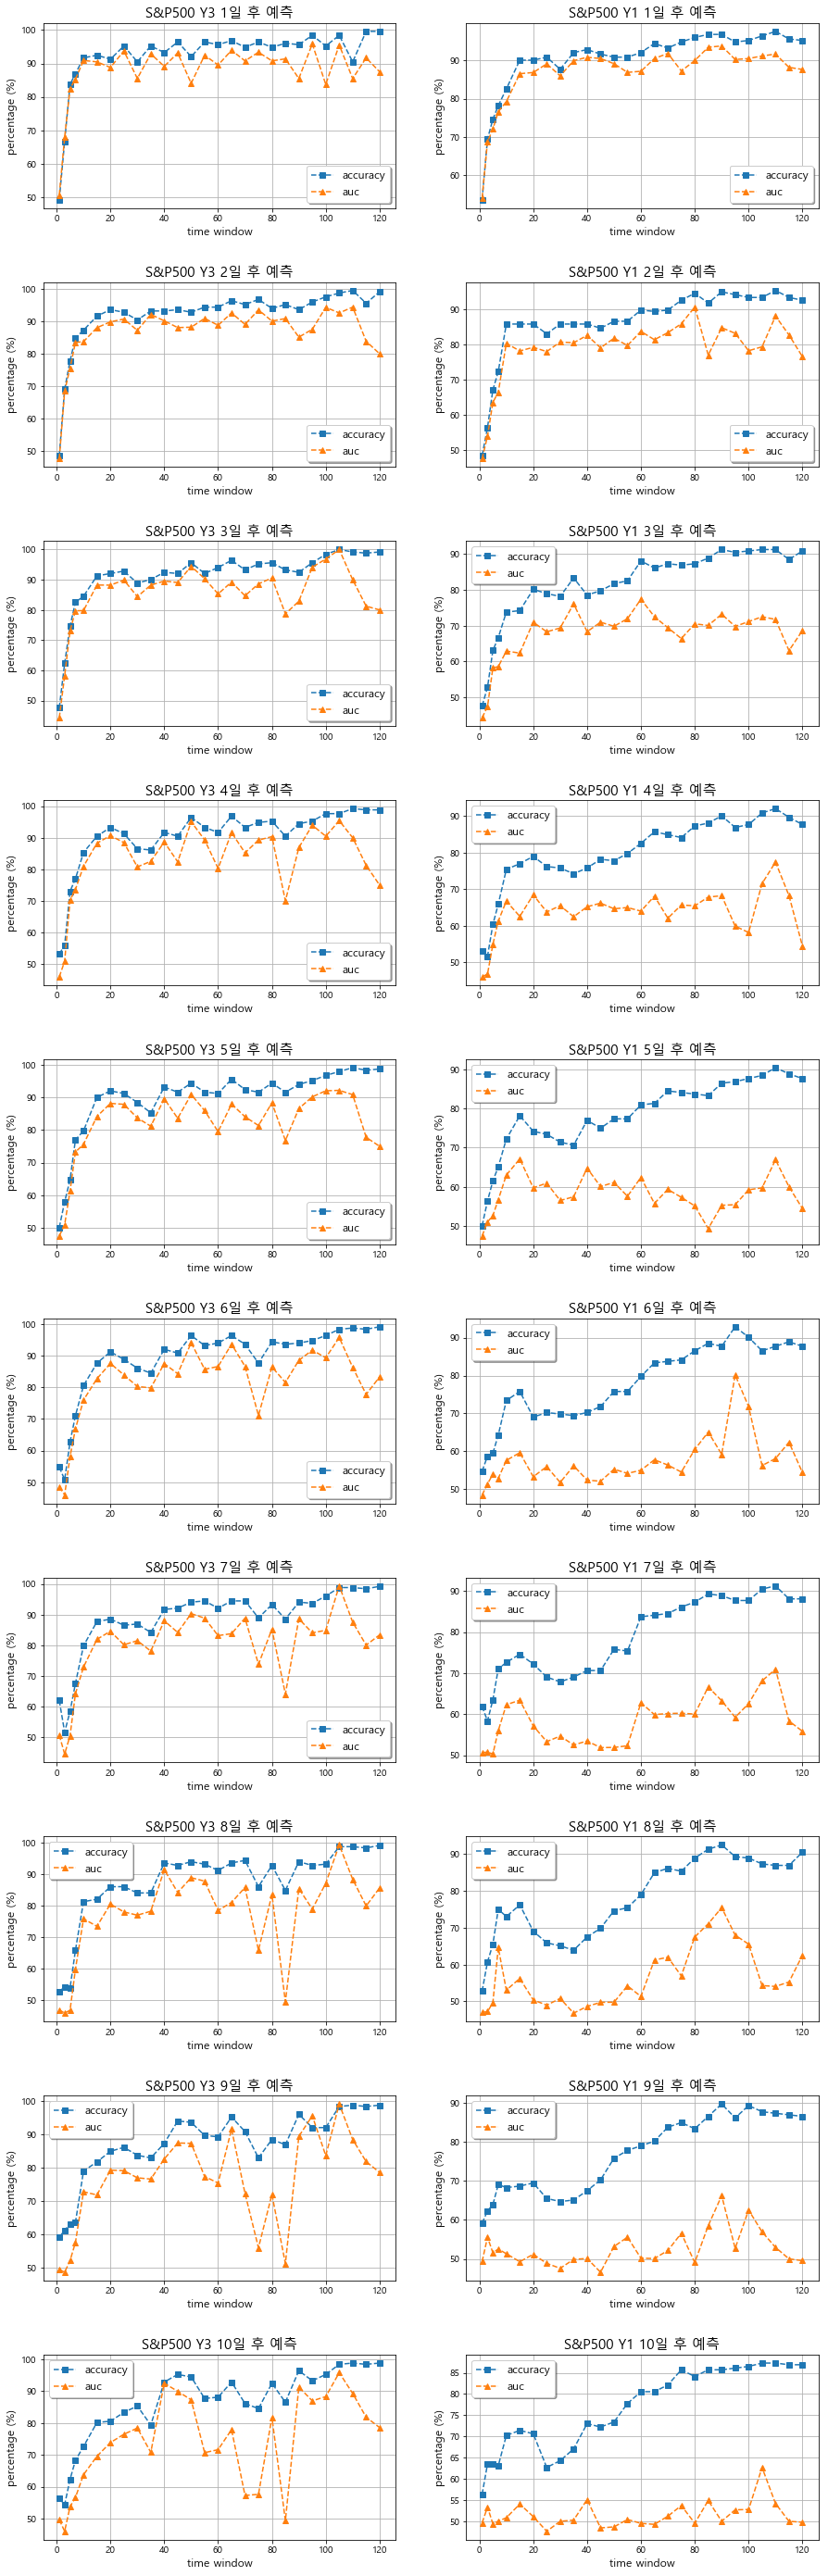

In [96]:
plt.figure(figsize=(15,50))
for idx, col in enumerate(res1.columns):
    plt.subplot2grid((10,2), (idx%10, idx//10))
    plt.plot(pd.Series(res1[col[0]][col[1]].swaplevel()['accuracy'].values * 100, index=li2),
             label='accuracy', marker='s', ls='--')
    plt.plot(pd.Series(res1[col[0]][col[1]].swaplevel()['auc'].values * 100, index=li2),
             label='auc', marker='^', ls='--')
    plt.title('S&P500 {} {} 후 예측'.format(*col), fontsize=15)
    plt.legend(shadow=True, fontsize=12)
    plt.xlabel('time window', fontsize=12)
    plt.ylabel('percentage (%)', fontsize=12)
    plt.grid()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [125]:
list(train.columns)

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'pct_change',
 'close_ma_3',
 'close_ma_5',
 'close_ma_7',
 'close_ma_9',
 'close_ma_11',
 'close_ma_13',
 'close_ma_15',
 'close_ma_17',
 'close_ma_19',
 'close_ma_21',
 'close_ma_23',
 'close_ma_25',
 'close_ma_27',
 'close_ma_29',
 'his_vol_7',
 'his_vol_21',
 'his_vol_30',
 'his_vol_60',
 'his_vol_90',
 'his_vol_91',
 'his_vol_100',
 'his_vol_120',
 'returnsCO1',
 'returnsCC1',
 'returnsOO1',
 'returnsOC1',
 'returnsCO3',
 'returnsCC3',
 'returnsOO3',
 'returnsOC3',
 'returnsCO5',
 'returnsCC5',
 'returnsOO5',
 'returnsOC5',
 'returnsCO7',
 'returnsCC7',
 'returnsOO7',
 'returnsOC7',
 'returnsCO10',
 'returnsCC10',
 'returnsOO10',
 'returnsOC10',
 'returnsCO12',
 'returnsCC12',
 'returnsOO12',
 'returnsOC12',
 'returnsCO14',
 'returnsCC14',
 'returnsOO14',
 'returnsOC14',
 'Y1_1_s1',
 'Y3_1_s1',
 'sh1_Y1_1',
 'sh1_Y3_1',
 'sh1_Y_val',
 'Y1_1_s2',
 'Y3_1_s2',
 'sh2_Y1_1',
 'sh2_Y3_1',
 'sh2_Y_val',
 'Y1_1_s3',
 'Y3_1_s3',
 'sh3_Y1_1

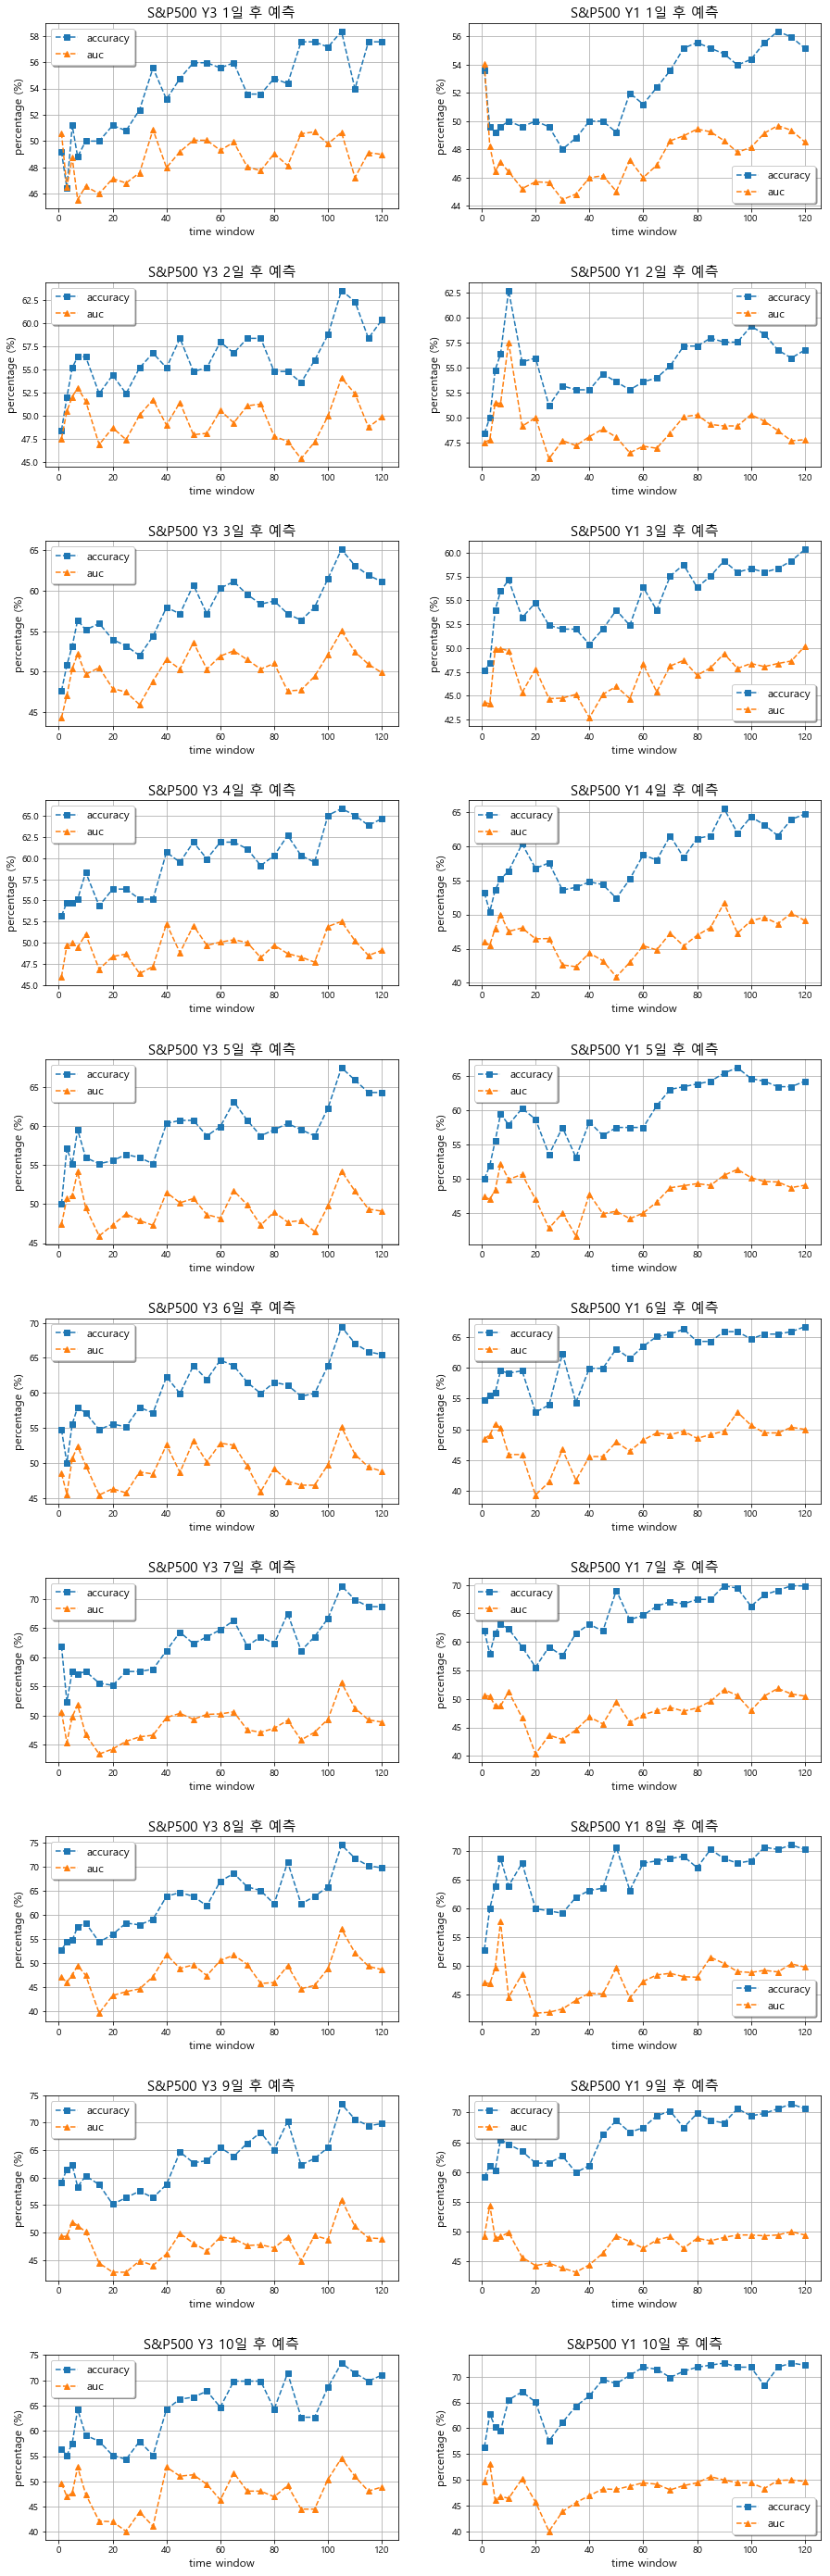

In [122]:
plt.figure(figsize=(15,50))
for idx, col in enumerate(res1.columns):
    plt.subplot2grid((10,2), (idx%10, idx//10))
    plt.plot(pd.Series(res2[col[0]][col[1]].swaplevel()['accuracy'].values * 100, index=li2),
             label='accuracy', marker='s', ls='--')
    plt.plot(pd.Series(res2[col[0]][col[1]].swaplevel()['auc'].values * 100, index=li2),
             label='auc', marker='^', ls='--')
    plt.title('S&P500 {} {} 후 예측'.format(*col), fontsize=15)
    plt.legend(shadow=True, fontsize=12)
    plt.xlabel('time window', fontsize=12)
    plt.ylabel('percentage (%)', fontsize=12)
    plt.grid()
plt.savefig('20181117_figure.png', dpi=None, facecolor='w', 
            edgecolor='w',orientation='portrait', 
            papertype=None, format=None,transparent=False, 
            bbox_inches="tight", pad_inches=0.1,frameon=None)
plt.subplots_adjust(hspace=0.4)
plt.show()

In [120]:
res2.to_csv('20181117_result.csv')

In [125]:
x = np.linspace(-5,5,101)
y1 = x**2
y2 = 2*x

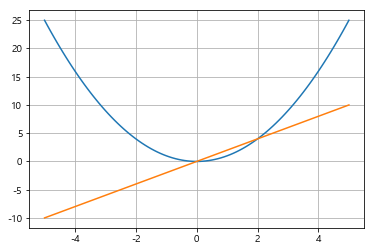

In [127]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.grid()

In [130]:
np.vstack((x, y1))

array([[-5.000e+00, -4.900e+00, -4.800e+00, -4.700e+00, -4.600e+00,
        -4.500e+00, -4.400e+00, -4.300e+00, -4.200e+00, -4.100e+00,
        -4.000e+00, -3.900e+00, -3.800e+00, -3.700e+00, -3.600e+00,
        -3.500e+00, -3.400e+00, -3.300e+00, -3.200e+00, -3.100e+00,
        -3.000e+00, -2.900e+00, -2.800e+00, -2.700e+00, -2.600e+00,
        -2.500e+00, -2.400e+00, -2.300e+00, -2.200e+00, -2.100e+00,
        -2.000e+00, -1.900e+00, -1.800e+00, -1.700e+00, -1.600e+00,
        -1.500e+00, -1.400e+00, -1.300e+00, -1.200e+00, -1.100e+00,
        -1.000e+00, -9.000e-01, -8.000e-01, -7.000e-01, -6.000e-01,
        -5.000e-01, -4.000e-01, -3.000e-01, -2.000e-01, -1.000e-01,
         0.000e+00,  1.000e-01,  2.000e-01,  3.000e-01,  4.000e-01,
         5.000e-01,  6.000e-01,  7.000e-01,  8.000e-01,  9.000e-01,
         1.000e+00,  1.100e+00,  1.200e+00,  1.300e+00,  1.400e+00,
         1.500e+00,  1.600e+00,  1.700e+00,  1.800e+00,  1.900e+00,
         2.000e+00,  2.100e+00,  2.200e+00,  2.3